Моделирование связи частотного и классического определения вероятности

Формулировка

В коробке находится $m$ красных и $n$ синих шаров. Из коробки случайным образом извлекаются 2 шара (без возвращения). Требуется найти вероятность того, что извлеченные шары будут разных цветов.

Теоретическая вероятность

Общее число исходов (выбор 2 шаров из всех):

$$N_{\text{общ}} = C_{m+n}^2 = \frac{(m+n)!}{2!(m+n-2)!} = \frac{(m+n)(m+n-1)}{2}$$

Благоприятные исходы (один красный и один синий шар):

$$N_{\text{благ}} = m \cdot n$$

Классическая вероятность:

$$P_{\text{класс}} = \frac{N_{\text{благ}}}{N_{\text{общ}}} = \frac{2 m n}{(m+n)(m+n-1)}$$

Частотное определение вероятности

При проведении $N$ испытаний:

$$P_{\text{част}} = \frac{k}{N}$$

где $k$ – количество испытаний, в которых были извлечены шары разных цветов.

Конкретный пример

При $m = 3$ (красных шара), $n = 5$ (синих шаров):

$$P_{\text{класс}} = \frac{2 \cdot 3 \cdot 5}{(3+5)(3+5-1)} = \frac{30}{8 \cdot 7} = \frac{30}{56} \approx 0.535714$$

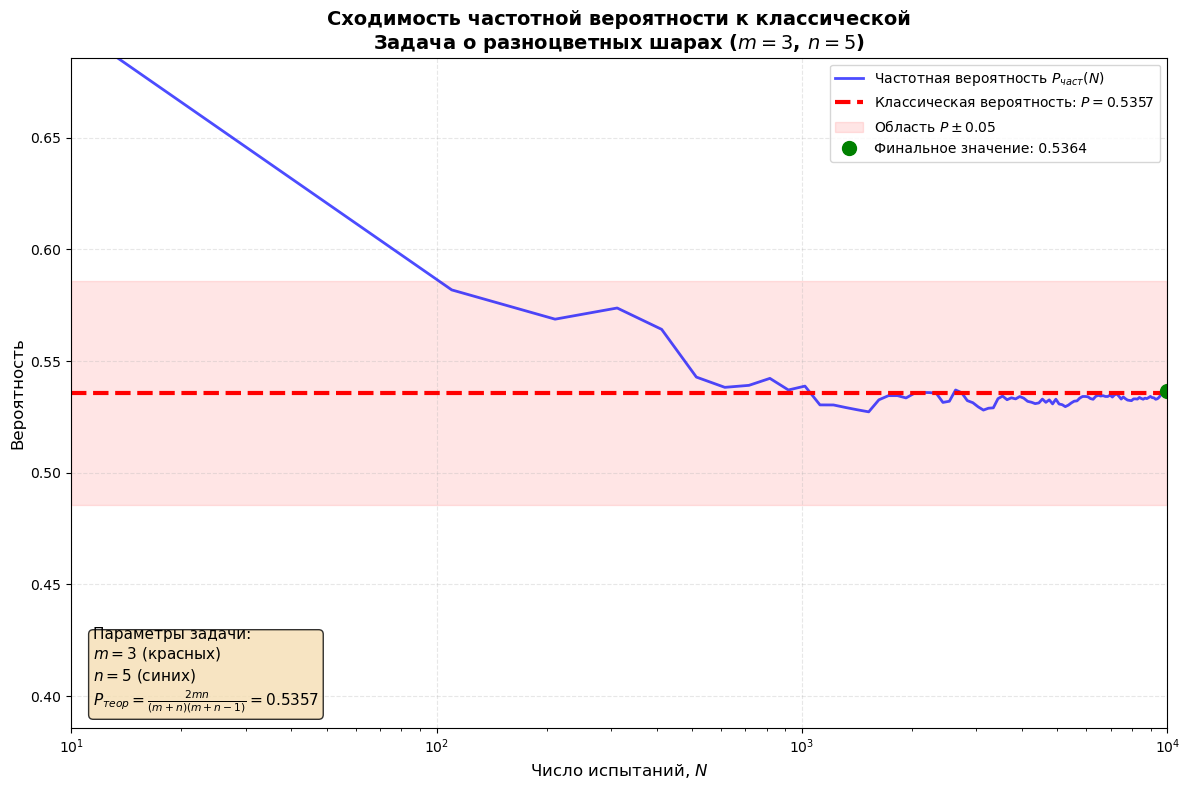

Параметры задачи:
    Красные шары: m = 3
    Синие шары: n = 5
    Всего шаров: 8
Теоретическая вероятность:
    P = 2mn/((m+n)(m+n-1)) = 30/(8×7) = 0.535714
Экспериментальные результаты:
    Общее число испытаний: N = 10,000
    Финальная частотная вероятность: P* = 0.536400
Анализ сходимости:
    Абсолютная ошибка: |P* - P| = 0.000686
    Относительная ошибка: |P* - P|/P = 0.128%

Сходимость при увеличении N:
  N =    10: Частотная вероятность = 0.7000, ошибка = 0.1643
  N =    50: Частотная вероятность = 0.7000, ошибка = 0.1643
  N =   100: Частотная вероятность = 0.5818, ошибка = 0.0461
  N =   500: Частотная вероятность = 0.5428, ошибка = 0.0071
  N =  1000: Частотная вероятность = 0.5388, ошибка = 0.0030
  N =  5000: Частотная вероятность = 0.5329, ошибка = 0.0028
  N = 10000: Частотная вероятность = 0.5364, ошибка = 0.0007


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
m = 3  # красные шары
n = 5  # синие шары
N_total = 10000  # общее количество испытаний
num_points = 100  # количество точек для графика сходимости

# Теоретическая вероятность
def theoretical_probability(m, n):
    return (2 * m * n) / ((m + n) * (m + n - 1))

P_theor = theoretical_probability(m, n)

# Моделирование эксперимента
N_values = np.linspace(10, N_total, num_points, dtype=int)
freq_probabilities = []

current_successes = 0
current_N = 0

for N_batch in np.diff(np.concatenate(([0], N_values))):
    for i in range(N_batch):
        # Создаем список шаров: 0 - красный, 1 - синий
        balls = [0] * m + [1] * n
        # Случайно выбираем 2 шара без возвращения
        selected = np.random.choice(balls, size=2, replace=False)
        # Проверяем, что шары разных цветов (сумма = 1)
        if np.sum(selected) == 1:
            current_successes += 1
        current_N += 1
    
    freq_probabilities.append(current_successes / current_N)

# Визуализация
plt.figure(figsize=(12, 8))

plt.plot(N_values, freq_probabilities, 'b-', alpha=0.7, linewidth=2, 
         label='Частотная вероятность $P_{част}(N)$')

# Теоретическая вероятность
plt.axhline(y=P_theor, color='r', linestyle='--', linewidth=3, 
           label=f'Классическая вероятность: $P = {P_theor:.4f}$')

# Область ±0.05 от теоретической
plt.fill_between(N_values, P_theor - 0.05, P_theor + 0.05, alpha=0.1, 
                 color='red', label='Область $P \\pm 0.05$')

# График
plt.xlabel('Число испытаний, $N$', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)
plt.title('Сходимость частотной вероятности к классической\n' +
          f'Задача о разноцветных шарах ($m={m}$, $n={n}$)', 
          fontsize=14, fontweight='bold')

plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xscale('log')
plt.xlim(10, N_total)
plt.ylim(P_theor - 0.15, P_theor + 0.15)

info_text = f"Параметры задачи:\n$m={m}$ (красных)\n$n={n}$ (синих)\n$P_{{теор}} = \\frac{{2mn}}{{(m+n)(m+n-1)}} = {P_theor:.4f}$"
plt.text(0.02, 0.02, info_text, transform=plt.gca().transAxes, 
         fontsize=11, verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

final_exp_prob = freq_probabilities[-1]
plt.plot(N_values[-1], final_exp_prob, 'go', markersize=10, 
         label=f'Финальное значение: {final_exp_prob:.4f}')

plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

print(f"Параметры задачи:")
print(f"    Красные шары: m = {m}")
print(f"    Синие шары: n = {n}")
print(f"    Всего шаров: {m+n}")

print(f"Теоретическая вероятность:")
print(f"    P = 2mn/((m+n)(m+n-1)) = {2*m*n}/({m+n}×{m+n-1}) = {P_theor:.6f}")

print(f"Экспериментальные результаты:")
print(f"    Общее число испытаний: N = {N_total:,}")
print(f"    Финальная частотная вероятность: P* = {final_exp_prob:.6f}")

error_abs = abs(final_exp_prob - P_theor)
error_rel = error_abs / P_theor * 100
print(f"Анализ сходимости:")
print(f"    Абсолютная ошибка: |P* - P| = {error_abs:.6f}")
print(f"    Относительная ошибка: |P* - P|/P = {error_rel:.3f}%")
print()

# Проверка на разных интервалах N
print("Сходимость при увеличении N:")
check_points = [10, 50, 100, 500, 1000, 5000, 10000]
for N_check in check_points:
    if N_check <= N_total:
        idx = np.argmin(np.abs(N_values - N_check))
        prob_at_N = freq_probabilities[idx]
        error_at_N = abs(prob_at_N - P_theor)
        print(f"  N = {N_check:5d}: Частотная вероятность = {prob_at_N:.4f}, ошибка = {error_at_N:.4f}")